## Machine Learning - Assignment 2
### Classify the email using the binary classification method. Email Spam detection has two states: 
    a) Normal State – Not Spam
    b) Abnormal State – Spam. 
Use K-Nearest Neighbors and Support Vector Machine for classification. Analyze their performance.

Dataset link: The emails.csv dataset on the Kaggle
https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid",font_scale = 1)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("emails.csv") #Reading the Dataset
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [4]:
df.drop(columns=['Email No.'], inplace=True) #Dropping Email No. as it is irrelevant.
df.head()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0


In [5]:
#Splitting the Dataset
X=df.iloc[:, :df.shape[1]-1]
Y=df.iloc[:, -1]
x_train, x_test, y_train, y_test=train_test_split(X, Y, test_size=0.20, random_state=8) 

In [6]:
def train_model(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    
    conf_matrix=confusion_matrix(y_test, y_pred)
   
    print('Evaluation Metrics :\n')
    print('Accuracy = %.3f'%(accuracy_score(y_test, y_pred)))
    print('Precision = %.3f'%(precision_score(y_test, y_pred,average='macro')))
    print('Recall = %.3f'%(recall_score(y_test, y_pred,average='macro')))
    
   
    plt.figure(figsize=(8,5))
    p=sns.heatmap(conf_matrix,annot=True,cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()
    return conf_matrix

Evaluation Metrics :

Accuracy = 0.879
Precision = 0.858
Recall = 0.852


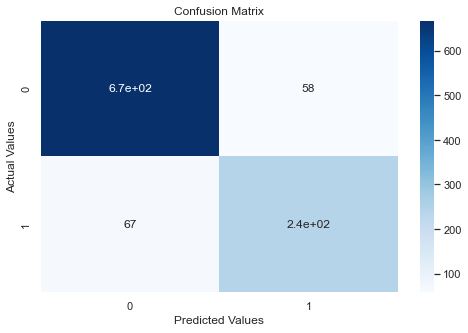

In [7]:
knn = KNeighborsClassifier(n_neighbors=10) #KNN Model
c=train_model(knn,x_train,y_train,x_test,y_test)

Evaluation Metrics :

Accuracy = 0.916
Precision = 0.891
Recall = 0.921


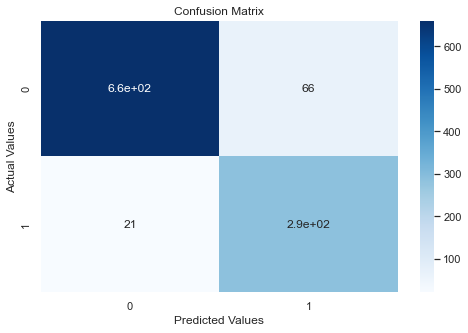

In [8]:
svm = SVC(kernel='linear',random_state=3,max_iter=1000) #SVM Model
c=train_model(svm,x_train,y_train,x_test,y_test)

Evaluation Metrics :

Accuracy = 0.824
Precision = 0.801
Recall = 0.762


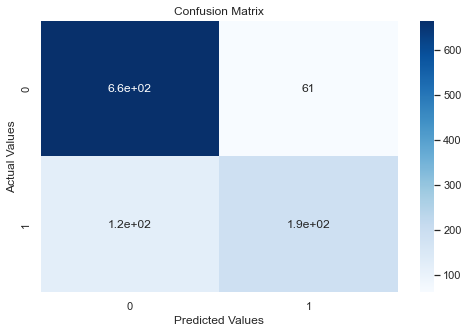

In [9]:
svm = SVC(kernel='rbf',random_state=3,max_iter=1000) #SVM Model
c=train_model(svm,x_train,y_train,x_test,y_test)